## picca_xcf.py

$z_{\rm{ref}}$ : 

parser.add_argument('--z-ref', type=float, default=2.25, required=False,
        help='Reference redshift')

$\alpha$:

parser.add_argument('--z-evol-del', type=float, default=2.9, required=False,
        help='Exponent of the redshift evolution of the delta field')

parser.add_argument('--z-evol-obj', type=float, default=1., required=False,
        help='Exponent of the redshift evolution of the object field')
        
weight:

$$w_i = \frac{1}{\eta \cdot \rm{var} + \rm{var_{lss}} + \rm{fudge/var}}(\frac{1+z}{1+z_{\rm{ref}}})^{\alpha -1}$$


令两个$\alpha$=0

# DLA

- 2.0 < z <3.5
- non-BAL
- $z_{abs}$ < $z_{em}$

In [39]:
import astropy.io.fits as fits
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import scipy.interpolate

out = fits.open('eboss_out.fits')
we = out[2].data['WE']
cor = np.sum(we*out[2].data['DA'],axis=0)
cor /= we.sum(0)


rp = out[1].data['RP']
rt = out[1].data['RT']
nb = out[1].data['NB']

rrt = rt.reshape((50,-1))  #(50,100)，each row at rt=0~200 at a fixed rp, each column at rp=-200~200
rrp = rp.reshape((100,-1)) #(100,50)，each row at a fixed rp for rt=0~200, each column at rp=-200~200 
ccor = cor.reshape((100,-1))

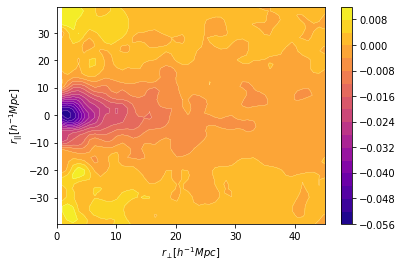

In [41]:
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

ccor[:,0]=np.nan
kernel = Gaussian2DKernel(x_stddev=1)  # smooth the map to improve SNR
conv = convolve(ccor,kernel)

bound=25
conv[:,0] = np.nan
x,y = np.meshgrid(np.linspace(0,45,50),np.linspace(-80,80,100))
mpl.rcParams['contour.negative_linestyle'] = 'solid'
plt.contour(x[bound:-bound,:],y[bound:-bound,:],conv[bound:-bound,:],20,colors=('white',),linewidths=(0.2,),)
plt.contourf(x[bound:-bound,:],y[bound:-bound,:],conv[bound:-bound,:],20,cmap='plasma')
plt.xlabel(r'$r_{\perp}[h^{-1}Mpc]$')
plt.ylabel(r'$r_{||}[h^{-1}Mpc]$')
plt.colorbar()

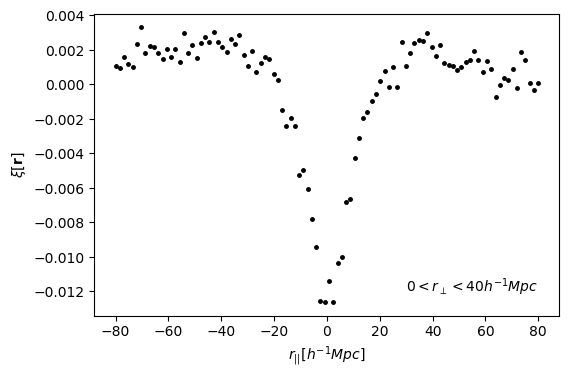

In [42]:
Rp = np.linspace(-80,80,100)
Cor = np.nanmean(ccor,axis=1)
f = plt.figure(dpi=100)    
plt.plot(Rp,Cor,'.',c='k',ms=5)
plt.xlabel(r'$r_{||} [h^{-1}Mpc]$')
plt.ylabel(r'$\xi[{\bf r}]$')
plt.text(x=30,y=-0.012,s=r'$0<r_\perp<40h^{-1}Mpc$')
plt.show()